In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import VotingRegressor
#for visualization of initial dataset
cv = pd.read_csv('pk_crop_value.csv')
cv.head()
#cy.pivot_table(values="value", index="year", columns="crop").plot(figsize=(9,7))

,crop,year,value,crop_val
0,"Almonds, with shell",1991,1168830,0
1,"Almonds, with shell",1992,1388520,0
2,"Almonds, with shell",1993,2437618,0
3,"Almonds, with shell",1994,2673166,0
4,"Almonds, with shell",1995,2776848,0


In [2]:
cv_train = pd.read_csv('pk_crop_value_train.csv')
cv_train.head()

,crop,year,value,crop_val
0,"Groundnuts, with shell",1997,2591324,24
1,Sweet potatoes,1997,65999,62
2,"Fruit, tropical fresh nes",2012,14723217,20
3,"Tobacco, unmanufactured",2012,6547002,64
4,Chick peas,2006,5800176,12


      Actual-Value  Predicted-Value
0          2591324    -5.027387e+05
1            65999     1.264300e+07
2         14723217     1.460883e+07
3          6547002     2.822754e+07
4          5800176     3.805692e+06
...            ...              ...
1357        123857     6.251373e+06
1358     238379275     1.271755e+08
1359        576469    -6.108837e+06
1360         53889     3.183349e+06
1361        390767     7.894349e+06

[1362 rows x 2 columns]


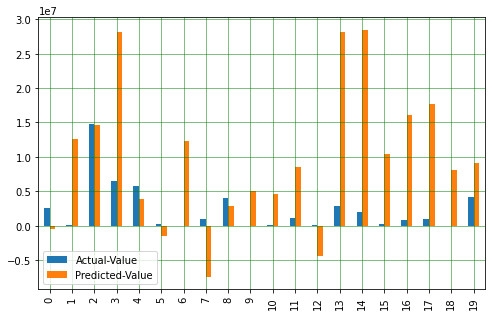

In [3]:
cv_output = cv_train['value']
cv_input = cv_train[['crop_val','year']]

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg4 = ElasticNet(random_state=1)
reg5 = Lasso(random_state=1)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3), ('el', reg4), ('la', reg5)])
ereg = ereg.fit(cv_input, cv_output)


cv_predict = ereg.predict(cv_input)
df = pd.DataFrame({'Actual-Value': cv_output, 'Predicted-Value': cv_predict})
print(df)

df1 = df.head(20)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

     Actual-Yield  Predicted-Yield
0           85318     4.974451e+06
1            5403    -4.393692e+06
2            4008     2.836894e+07
3          141429     1.183084e+07
4          132235    -1.038206e+07
..            ...              ...
625        102488     9.762972e+06
626        109455     1.580886e+07
627         35966     2.192984e+07
628          9976     1.580415e+07
629          8149     1.573832e+07

[630 rows x 2 columns]


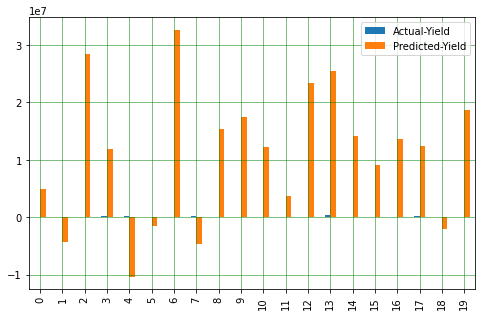

In [4]:
cy_test = pd.read_csv('pk_crop_yield_test.csv')
cy_output_test = cy_test['value']
cy_input_test = cy_test[['crop_val','year']]

cy_output_test_predict = ereg.predict(cy_input_test)
df = pd.DataFrame({'Actual-Yield': cy_output_test, 'Predicted-Yield': cy_output_test_predict})
print(df)

df1 = df.head(20)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [5]:
user_input_crop = 4
user_input_year = 2021 
test_user_predict = ereg.predict([[user_input_crop, user_input_year]]) 
print (test_user_predict)

[12872875.08155369]


In [6]:
pd.to_pickle(ereg,r'..\crop_value_model.pickle')